# Behavioral Cloning

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os
import json
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD, Adam, RMSprop
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage
from scipy.misc import imresize
import cv2

print("All module loaded")

Using TensorFlow backend.


All module loaded


## 

In [22]:
resizedX = 80
resizedY = 27
resizedCrop = 13
resizedOY = 40
# Get steering angles for Clock-wise driving, 5 laps
angles = pd.read_csv('data/driving_log.csv',header=None)
# angles.columns = ('Center Image','Left Image','Right Image','Steering Angle','Throttle','Brake','Speed')
angles.columns = ('center','left','right','steering','throttle','brake','speed')
# angles = np.array(angles['Steering Angle'])
angles = np.array(angles['steering'])
angles = angles[1:]
angles = angles.astype(np.float)
angles

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

8036
8036


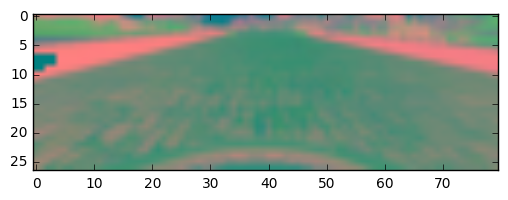

In [23]:


# Construct arrays for center, right and left images of controlled driving
images = np.asarray(os.listdir("data/IMG/"))
images = images[0:]
center = np.ndarray(shape=(len(angles), resizedY, resizedX, 3))
right = np.ndarray(shape=(len(angles), resizedY, resizedX, 3))
left = np.ndarray(shape=(len(angles), resizedY, resizedX, 3))

# Images are resized to 32x64 to increase training speeds
# Then we cropped top 12 pixels as they had no useful information for training
# Final size is 20 x 64 x 3
count = 0
for image in images:
    image_file = os.path.join('data/IMG', image)
    if image.startswith('center'):
        image_data = mpimg.imread(image_file)
        image_data = cv2.cvtColor(image_data, cv2.COLOR_BGR2YUV)
        #Histogram the Y Channel to make it more robust
#         image_data[:,:,0] = cv2.equalizeHist(image_data[:,:,0])
        center[count % len(angles)] = imresize(image_data, (resizedOY,resizedX,3))[resizedCrop:,:,:]
    elif image.startswith('right'):
        image_data = mpimg.imread(image_file)
        image_data = cv2.cvtColor(image_data, cv2.COLOR_BGR2YUV)
#         image_data[:,:,0] = cv2.equalizeHist(image_data[:,:,0])
        #Histogram the Y Channel to make it more robust
        right[count % len(angles)] = imresize(image_data, (resizedOY,resizedX,3))[resizedCrop:,:,:]
    elif image.startswith('left'):
        image_data = mpimg.imread(image_file)
        image_data = cv2.cvtColor(image_data, cv2.COLOR_BGR2YUV)
#         image_data[:,:,0] = cv2.equalizeHist(image_data[:,:,0])
        #Histogram the Y Channel to make it more robust
        left[count % len(angles)] = imresize(image_data, (resizedOY,resizedX,3))[resizedCrop:,:,:]
    count += 1

%matplotlib inline
plt.imshow(center[0])

print(len(center))
print(len(angles))

In [5]:
# # Get Counter-Clock steering angles for controlled driving
# counter_angles = pd.read_csv('Counter-Clock/driving_log.csv',header=None)
# counter_angles.columns = ('Center Image','Left Image','Right Image','Steering Angle','Throttle','Brake','Speed')
# counter_angles = np.array(counter_angles['Steering Angle'])

# # Construct arrays for center, right and left images of controlled driving
# images = np.asarray(os.listdir("Counter-Clock/IMG/"))
# images = images[0:]
# counter_center = np.ndarray(shape=(len(counter_angles), resizedY, resizedX, 3))
# counter_right = np.ndarray(shape=(len(counter_angles), resizedY, resizedX, 3))
# counter_left = np.ndarray(shape=(len(counter_angles), resizedY, resizedX, 3))

# # Images are resized to 32x64 to increase training speeds
# # Then we cropped top 12 pixels as they had no useful information for training
# # Final size is 20 x 64 x 3
# count = 0
# for image in images:
#     image_file = os.path.join('Counter-Clock/IMG', image)
#     if image.startswith('center'):
#         image_data = mpimg.imread(image_file)
#         image_data = cv2.cvtColor(image_data, cv2.COLOR_BGR2YUV)
#         #Histogram the Y Channel to make it more robust
#         image_data[:,:,0] = cv2.equalizeHist(image_data[:,:,0])
#         counter_center[count % len(counter_angles)] = imresize(image_data, (resizedOY,resizedX,3))[resizedCrop:,:,:]
#     elif image.startswith('right'):
#         image_data = mpimg.imread(image_file)
#         image_data = cv2.cvtColor(image_data, cv2.COLOR_BGR2YUV)
#         image_data[:,:,0] = cv2.equalizeHist(image_data[:,:,0])
#         #Histogram the Y Channel to make it more robust
#         counter_right[count % len(counter_angles)] = imresize(image_data, (resizedOY,resizedX,3))[resizedCrop:,:,:]
#     elif image.startswith('left'):
#         image_data = mpimg.imread(image_file)
#         image_data = cv2.cvtColor(image_data, cv2.COLOR_BGR2YUV)
#         image_data[:,:,0] = cv2.equalizeHist(image_data[:,:,0])
#         #Histogram the Y Channel to make it more robust
#         counter_left[count % len(counter_angles)] = imresize(image_data, (resizedOY,resizedX,3))[resizedCrop:,:,:]
#     count += 1

# %matplotlib inline
# plt.imshow(counter_center[0])

# print(len(counter_center))
# print(len(counter_angles))

In [6]:
# # Get steering angles for recovery driving weaving out to the right 
# recovery_angles = pd.read_csv('Recovery/driving_log.csv', header = None)
# recovery_angles.columns = ('Center Image','Left Image','Right Image','Steering Angle','Throttle','Brake','Speed')
# recovery_angles = np.array(recovery_angles['Steering Angle'])

# # Construct array for recovery driving images
# recovery_images = np.asarray(os.listdir("Recovery/IMG/"))
# recovery_images = recovery_images[0:] # To ignore .DS_store on mac
# recovery = np.ndarray(shape=(len(recovery_angles), resizedY, resizedX, 3))

# # Populate recovery driving dataset
# count = 0
# for image in recovery_images:
#     if image.startswith('center'):
#         image_file = os.path.join('Recovery/IMG', image)
#         image_data = mpimg.imread(image_file)
#         image_data = cv2.cvtColor(image_data, cv2.COLOR_BGR2YUV)
#         image_data[:,:,0] = cv2.equalizeHist(image_data[:,:,0])
#         recovery[count] = imresize(image_data, (resizedOY,resizedX,3))[resizedCrop:,:,:]
#         count += 1
# %matplotlib inline
# plt.imshow(recovery[0])

In [7]:
# # Get steering angles for recovery driving weaving out to the left 
# recovery_left_angles = pd.read_csv('Recovery_left/driving_log.csv', header = None)
# recovery_left_angles.columns = ('Center Image','Left Image','Right Image','Steering Angle','Throttle','Brake','Speed')
# recovery_left_angles = np.array(recovery_left_angles['Steering Angle'])

# # Construct array for recovery driving images
# recovery_left_images = np.asarray(os.listdir("Recovery_left/IMG/"))
# recovery_left_images = recovery_left_images[0:] # To ignore .DS_store on mac
# recovery_left = np.ndarray(shape=(len(recovery_left_angles), resizedY, resizedX, 3))

# # Populate recovery driving dataset
# count = 0
# for image in recovery_left_images:
#     if image.startswith('center'):
#         image_file = os.path.join('Recovery_left/IMG', image)
#         image_data = mpimg.imread(image_file)
#         image_data = cv2.cvtColor(image_data, cv2.COLOR_BGR2YUV)
#         image_data[:,:,0] = cv2.equalizeHist(image_data[:,:,0])
#         recovery_left[count] = imresize(image_data, (resizedOY,resizedX,3))[resizedCrop:,:,:]
#         count += 1
# %matplotlib inline
# plt.imshow(recovery_left[0])

In [8]:
# # Get steering angles for recovery driving weaving out to the left 
# recovery_left_angles = pd.read_csv('Recovery_left/driving_log.csv', header = None)
# recovery_left_angles.columns = ('Center Image','Left Image','Right Image','Steering Angle','Throttle','Brake','Speed')
# recovery_left_angles = np.array(recovery_left_angles['Steering Angle'])

# # Construct array for recovery driving images
# recovery_left_images = np.asarray(os.listdir("Recovery_left/IMG/"))
# recovery_left_images = recovery_left_images[0:] # To ignore .DS_store on mac
# recovery_left = np.ndarray(shape=(len(recovery_left_angles), 20, 64, 3))

# # Populate recovery driving dataset
# count = 0
# for image in recovery_left_images:
#     if image.startswith('center'):
#         image_file = os.path.join('Recovery_left/IMG', image)
#         image_data = mpimg.imread(image_file)
#         image_data = cv2.cvtColor(image_data, cv2.COLOR_BGR2YUV)
#         image_data[:,:,0] = cv2.equalizeHist(image_data[:,:,0])
#         recovery_left[count] = imresize(image_data, (32,64,3))[12:,:,:]
#         count += 1
# %matplotlib inline
# plt.imshow(recovery_left[0])


# randomYUV = np.ndarray(shape=(X_train.shape))
# im_out = np.ndarray(shape=[X_train[0].shape[0],X_train[0].shape[1]])
# im = np.ndarray(shape=[X_train[0].shape[0],X_train[0].shape[1],3])

# count = 0
# for i in range(len(X_train)):
#     im = np.copy(X_train[i])
#     alpha = (np.random.random()-0.5)*0.1 + 1
#     beta = 0
#     channel = (int)(np.random.random()*3)
#     im_channel = im[:,:,channel]
#     cv2.convertScaleAbs(im_channel,im_out,alpha,beta)
#     im[:,:,channel] = im_out
#     randomYUV[count] = im
#     count += 1


# plt.imshow(X_train[0])
# # Combine regular features/labels with random features/labels
# X_train = np.concatenate((X_train, randomYUV), axis=0)
# y_train = np.concatenate((y_train, y_train),axis=0)


4384
4384


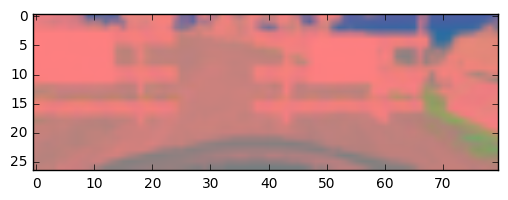

In [43]:
# Get Counter-Clock steering angles for controlled driving
angles2 = pd.read_csv('data_track2/driving_log.csv',header=None)
# angles.columns = ('Center Image','Left Image','Right Image','Steering Angle','Throttle','Brake','Speed')
angles2.columns = ('center','left','right','steering','throttle','brake','speed')
# angles = np.array(angles['Steering Angle'])
angles2 = np.array(angles2['steering'])
angles2 = angles2[1:]
angles2 = angles2.astype(np.float)
angles2

# Construct arrays for center, right and left images of controlled driving
images = np.asarray(os.listdir("data_track2/IMG/"))
images = images[0:]
center2 = np.ndarray(shape=(len(angles2), resizedY, resizedX, 3))
right2 = np.ndarray(shape=(len(angles2), resizedY, resizedX, 3))
left2 = np.ndarray(shape=(len(angles2), resizedY, resizedX, 3))

# Images are resized to 32x64 to increase training speeds
# Then we cropped top 12 pixels as they had no useful information for training
# Final size is 20 x 64 x 3
count = 0
for image in images:
    image_file = os.path.join('data_track2/IMG', image)
    if image.startswith('center'):
        image_data = mpimg.imread(image_file)
        image_data = cv2.cvtColor(image_data, cv2.COLOR_BGR2YUV)
        #Histogram the Y Channel to make it more robust
#         image_data[:,:,0] = cv2.equalizeHist(image_data[:,:,0])
        center2[count % len(angles2)] = imresize(image_data, (resizedOY,resizedX,3))[resizedCrop:,:,:]
    elif image.startswith('right'):
        image_data = mpimg.imread(image_file)
        image_data = cv2.cvtColor(image_data, cv2.COLOR_BGR2YUV)
#         image_data[:,:,0] = cv2.equalizeHist(image_data[:,:,0])
        #Histogram the Y Channel to make it more robust
        right2[count % len(angles2)] = imresize(image_data, (resizedOY,resizedX,3))[resizedCrop:,:,:]
    elif image.startswith('left'):
        image_data = mpimg.imread(image_file)
        image_data = cv2.cvtColor(image_data, cv2.COLOR_BGR2YUV)
#         image_data[:,:,0] = cv2.equalizeHist(image_data[:,:,0])
        #Histogram the Y Channel to make it more robust
        left2[count % len(angles2)] = imresize(image_data, (resizedOY,resizedX,3))[resizedCrop:,:,:]
    count += 1

%matplotlib inline
plt.imshow(center2[0])

print(len(center2))
print(len(angles2))

In [44]:
# Concatenate all arrays in to combined training dataset and labels
# for left and right cameras, we add one more 0.1 angles to make harder left or right turn for training
X_train = np.concatenate((center, right, left,center2, right2, left2), axis=0)
y_train = np.concatenate((angles, (angles - .2), (angles + .2),angles2, (angles2 - .2), (angles2 + .2)),axis=0)

# # Create a mirror image to create more training set
# mirror = np.ndarray(shape=(X_train.shape))
# count = 0
# for i in range(len(X_train)):
#     mirror[count] = np.fliplr(X_train[i])
#     count += 1
# mirror.shape

# # Create mirror image labels
# mirror_angles = y_train * -1

# # # Combine regular features/labels with mirror features/labels
# X_train = np.concatenate((X_train, mirror), axis=0)
# y_train = np.concatenate((y_train, mirror_angles),axis=0)

# # Randomly adjust Y,U,V Channel to make the training data set more robust
# randomYUV = np.ndarray(shape=(X_train.shape))
# im_out = np.ndarray(shape=[X_train[0].shape[0],X_train[0].shape[1]])
# im = np.ndarray(shape=[X_train[0].shape[0],X_train[0].shape[1],3])

# count = 0
# for i in range(len(X_train)):
#     im = np.copy(X_train[i])
#     alpha = (np.random.random()-0.5)*0.02 + 1
#     beta = 0
#     channel = (int)(np.random.random()*3)
#     im_channel = im[:,:,channel]
#     cv2.convertScaleAbs(im_channel,im_out,alpha,beta)
#     im[:,:,channel] = im_out
#     randomYUV[count] = im
#     count += 1
#     if i == 1000:
#         print(alpha)
#         print(channel)


# plt.imshow(X_train[0])
# # Combine regular features/labels with random features/labels
# X_train = np.concatenate((X_train, randomYUV), axis=0)
# y_train = np.concatenate((y_train, y_train),axis=0)

# # %matplotlib inline

print('done')


done


In [32]:
# plt.imshow(X_train[1000])

In [33]:
# plt.imshow(randomYUV[1000])

In [45]:
# print(X_train[1000],randomYUV[1000])
from keras.layers import Dense, Dropout, Activation, Flatten, Lambda, ELU

In [46]:
# Split data set to create training/validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.05)

# Model
model = Sequential()
model.add(Lambda(lambda x: x/127.5 - 1.,input_shape=(resizedY,resizedX,3)))
model.add(BatchNormalization(axis=1))
model.add(Convolution2D(24, 5, 5, border_mode='same', subsample=(2,2), activation='relu'))
model.add(Convolution2D(36, 5, 5, border_mode='same', subsample=(2,2), activation='relu'))
model.add(Convolution2D(48, 5, 5, border_mode='same', activation='relu'))
model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(Dropout(.5))
model.add(Flatten())
model.add(Dense(1164))
model.add(Activation('relu'))
model.add(Dropout(.5))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(.2))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dropout(.2))
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(1))
model.summary()

# Adam optimizer and learning rate of .0001
adam = Adam(lr=0.0001)
model.compile(loss='mse',
              optimizer=adam)

# Save weights on each epoch
checkpoint = ModelCheckpoint(filepath = 'model.h5', verbose = 1, save_best_only=True, monitor='val_loss')

# Stop training while validation loss fails to decrease
callback = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

# # Train model for 20 epochs and a batch size of 128
model.fit(X_train,
        y_train,
        nb_epoch=20,
        verbose=1,
        batch_size=128,
        shuffle=True,
        validation_data=(X_val, y_val),
        callbacks=[checkpoint, callback])

#print("Weights Saved")
json_string = model.to_json()
with open('model.json', 'w') as jsonfile:
    json.dump(json_string, jsonfile)
print("Model Saved")

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_7 (Lambda)                (None, 27, 80, 3)     0           lambda_input_6[0][0]             
____________________________________________________________________________________________________
batchnormalization_6 (BatchNorma (None, 27, 80, 3)     54          lambda_7[0][0]                   
____________________________________________________________________________________________________
convolution2d_26 (Convolution2D) (None, 14, 40, 24)    1824        batchnormalization_6[0][0]       
____________________________________________________________________________________________________
convolution2d_27 (Convolution2D) (None, 7, 20, 36)     21636       convolution2d_26[0][0]           
___________________________________________________________________________________________

## Summary
Keras is a great tool to use if you want to quickly build a neural network and evaluate performance.